In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
sns.set_style("white")
%matplotlib inline
PATH = "/Users/M/Google_Drive/Scripts/hs/worm/EMBO/writeup/Figures/fig3_total/unique/"

os.chdir(PATH)


# Get columns of total from HS, OK, sense and antisense

In [3]:
df_HS_S = pd.read_csv(PATH + "hs/Rsubread_senseunique_normalized_rRNA_star.txt",sep="\t").rename(columns={"X.BAMS.N2WT_INP_.bam":"TOTAL_WT_S","X.BAMS.N2HS_INP_.bam":"TOTAL_HS_S"})
df_OK_S = pd.read_csv(PATH + "ok/Rsubread_senseunique_normalized_rRNA_star.txt",sep="\t").rename(columns={"X.BAMS.OK803.INP__.bam":"TOTAL_OK_S"})
df_HS_A = pd.read_csv(PATH + "hs/Rsubread_antisenseunique_normalized_rRNA_star.txt",sep="\t").rename(columns={"X.BAMS.N2WT_INP_.bam":"TOTAL_WT_A","X.BAMS.N2HS_INP_.bam":"TOTAL_HS_A"})
df_OK_A = pd.read_csv(PATH + "ok/Rsubread_antisenseunique_normalized_rRNA_star.txt",sep="\t").rename(columns={"X.BAMS.OK803.INP__.bam":"TOTAL_OK_A"})


In [4]:
dfWT = df_HS_S[ ['GeneID', 'TOTAL_WT_S']].copy()
dfHS = df_HS_S[ ['GeneID', 'TOTAL_HS_S']].copy()
dfOK = df_OK_S[ ['GeneID', 'TOTAL_OK_S']].copy()
dfWT["TOTAL_WT_A"] = df_HS_A["TOTAL_WT_A"]
dfHS["TOTAL_HS_A"] = df_HS_A["TOTAL_HS_A"]
dfOK["TOTAL_OK_A"] = df_OK_A["TOTAL_OK_A"]

dfWT["WT rowmean"] = dfWT.mean(axis=1)
dfHS["HS rowmean"] = dfHS.mean(axis=1)
dfOK["OK rowmean"] = dfOK.mean(axis=1)
dfWT["WT log rowmean"] = np.log(dfWT["WT rowmean"])
dfHS["HS log rowmean"] = np.log(dfHS["HS rowmean"])
dfOK["OK log rowmean"] = np.log(dfOK["OK rowmean"])

dfWT["WT % Antisense over Sense"] = df_HS_A["TOTAL_WT_A"] / df_HS_S["TOTAL_WT_S"]
dfHS["HS % Antisense over Sense"] = df_HS_A["TOTAL_HS_A"] / df_HS_S["TOTAL_HS_S"]
dfOK["OK % Antisense over Sense"] = df_OK_A["TOTAL_OK_A"] / df_OK_S["TOTAL_OK_S"]

dfWT["WT log % Antisense over Sense"] = np.log(dfWT["WT % Antisense over Sense"])
dfHS["HS log % Antisense over Sense"] = np.log(dfHS["HS % Antisense over Sense"])
dfOK["OK log % Antisense over Sense"] = np.log(dfOK["OK % Antisense over Sense"])

df_HS = pd.merge(dfWT,dfHS,on="GeneID")
df_OK = pd.merge(dfWT,dfOK,on="GeneID")



46760
46760
1016
926
length of df_HS_UP is :  785
length of df_HS_DO is :  231
length of df_OK_UP is :  799
length of df_OK_DO is :  126


/Users/M/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


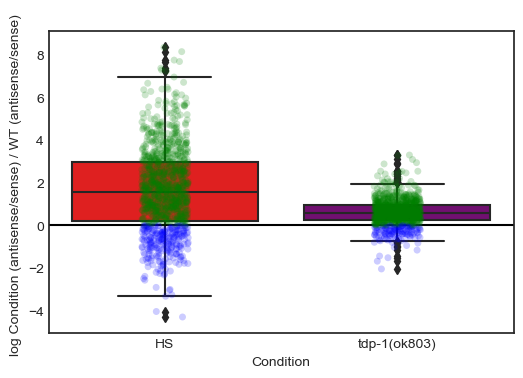

In [5]:
#Make sure columns have atleast this much in one
NUM = 20
print(len(df_HS))
print(len(df_OK))
df_HS = df_HS[ df_HS["TOTAL_WT_S" ]> NUM]
df_HS = df_HS[ df_HS["TOTAL_WT_S" ]> NUM]
df_HS = df_HS[ df_HS["TOTAL_HS_A" ]> NUM]
df_HS = df_HS[ df_HS["TOTAL_HS_A" ]> NUM]
                           
df_OK = df_OK[ df_OK["TOTAL_WT_S"] > NUM]
df_OK = df_OK[ df_OK["TOTAL_WT_S"] > NUM]
df_OK = df_OK[ df_OK["TOTAL_OK_A"] > NUM]
df_OK = df_OK[ df_OK["TOTAL_OK_A"] > NUM]
print(len(df_HS))
print(len(df_OK))


df_HS["HS % / WT % "] = df_HS["HS % Antisense over Sense"] / df_HS["WT % Antisense over Sense"]
df_OK["OK % / WT % "] = df_OK["OK % Antisense over Sense"] / df_OK["WT % Antisense over Sense"]
df_HS["log HS % / WT % "] = np.log(df_HS["HS % / WT % "])
df_OK["log OK % / WT % "] = np.log(df_OK["OK % / WT % "])

df_HS_UP =  df_HS[ df_HS["HS % / WT % "] > 1]
df_HS_DO = df_HS[ df_HS["HS % / WT % "] < 1]
df_OK_UP =  df_OK[ df_OK["OK % / WT % "] > 1]
df_OK_DO = df_OK[ df_OK["OK % / WT % "] < 1]
print("length of df_HS_UP is : ", len(df_HS_UP))
print("length of df_HS_DO is : ", len(df_HS_DO))
print("length of df_OK_UP is : ", len(df_OK_UP))
print("length of df_OK_DO is : ", len(df_OK_DO))

# sns.boxplot(x="log HS % / WT % ", data=df_HS)
# sns.stripplot(x="log HS % / WT % ", data=df_HS,jitter=True, dodge=True)

df_HS["log Condition (antisense/sense) / WT (antisense/sense) "] = np.log(df_HS["HS % / WT % "])
df_OK["log Condition (antisense/sense) / WT (antisense/sense) "] = np.log(df_OK["OK % / WT % "])

df_HS["Condition"] = "HS"
df_OK["Condition"] = "tdp-1(ok803)" 

df_both = pd.concat([df_HS,df_OK])
df_both["Antisense up in Condition"] =  df_both["log Condition (antisense/sense) / WT (antisense/sense) "] > 0 

df_antisense_up_in_condition =  df_both[df_both["log Condition (antisense/sense) / WT (antisense/sense) "] > 0 ]
df_antisense_up_in_condition.to_csv("Antisense_up_in_condition.csv",sep="\t",index=None)

plt = sns.boxplot(palette=["Red","Purple"],x="Condition", y="log Condition (antisense/sense) / WT (antisense/sense) ", data=df_both)
plt = sns.stripplot( alpha=0.2,x="Condition", y="log Condition (antisense/sense) / WT (antisense/sense) ", hue="Antisense up in Condition",palette=["Blue","Green"],data=df_both,jitter=True, dodge=False)
#plt.axhline(y="10", c='red',linestyle='dashed',zorder=-1) #zorder places the line underneath the other points
plt.axhline(y=0, color='black', linestyle='-',)
plt.legend_.remove()

fig = plt.get_figure()
fig.savefig("Total_antisense_ratio_cutoff_"+ str(NUM) + "_mean_hued_boxplot.png",dpi=600,format="tiff")

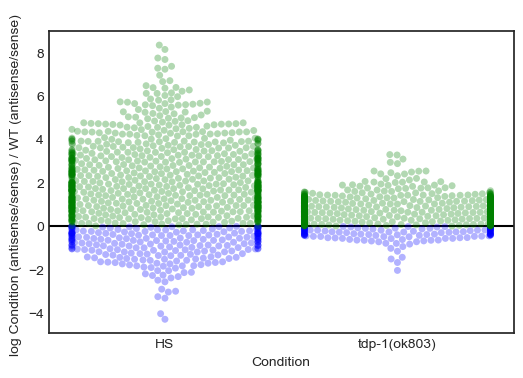

In [8]:
plt = sns.swarmplot(x="Condition", y="log Condition (antisense/sense) / WT (antisense/sense) ", data=df_both, dodge=False,hue="Antisense up in Condition",palette=["Blue","Green"],alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-')
fig = plt.get_figure()
plt.legend_.remove()
fig.savefig("Total_antisense_ratio_cutoff_"+ str(NUM) + "_mean_hued_swarm.tiff",dpi=500, format="tiff")

#Plot total amount of antisense genes for each condition (filtered by row mean for each condition

In [108]:
#Get amount of sense over antisense


dfWT = dfWT[dfWT["% Antisense over Sense"] > 1]
dfHS = dfHS[dfHS["% Antisense over Sense"] > 1]
dfOK = dfOK[dfOK["% Antisense over Sense"] > 1]
print("Amount of total antisense dfWT: ", len(dfWT))
print("Amount of total antisense dfHS: ", len(dfHS))
print("Amount of total antisense dfOK: ", len(dfOK))

#Filter by rowmean
rowmeannumber = 5
dfWT_rowmean = dfWT[dfWT["rowmean"] > rowmeannumber].copy()
dfHS_rowmean = dfHS[dfHS["rowmean"] > rowmeannumber].copy()
dfOK_rowmean = dfOK[dfOK["rowmean"] > rowmeannumber].copy()
print("Rowmean dfWT is : " ,len(dfWT))
print("Rowmean dfHS is : " ,len(dfHS))
print("Rowmean dfOK is : " ,len(dfOK))



KeyError: '% Antisense over Sense'

In [5]:
df = pd.concat([dfWT,dfHS,dfOK])

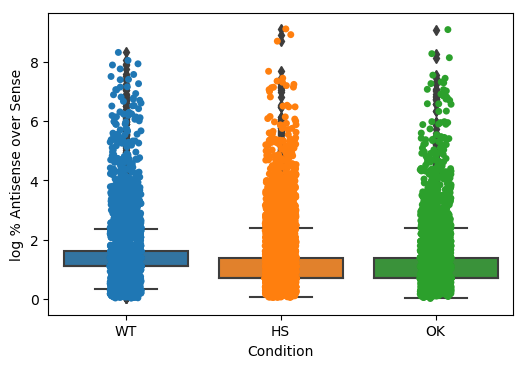

In [6]:
sns.boxplot(x="Condition", y="log % Antisense over Sense", data=df)
sns.stripplot(x="Condition", y="log % Antisense over Sense", data=df,jitter=True, dodge=True)

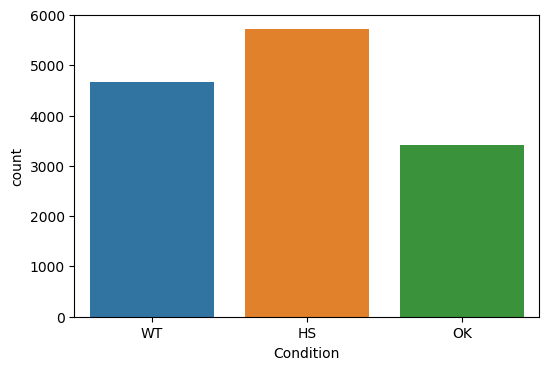

In [9]:
sns.countplot(x="Condition", data=df)